<br>
<br>


# `# Decision tree Classifier:`

<br>
<br>

<br>

### Custom Data(salaries): 

<br>

In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [63]:
df = pd.read_csv("dataset/salaries.csv")
df.sample(5)

,company,job,degree,salary_more_then_100k
12,facebook,business manager,bachelors,1
2,google,business manager,bachelors,1
8,abc pharma,business manager,bachelors,0
5,google,computer programmer,masters,1
10,facebook,sales executive,bachelors,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [65]:

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df["salary_more_then_100k"],test_size=0.3,random_state=42)
print(f"size_of_train_data : {X_train.shape}")
print(f"size_of_test_data : {X_test.shape}") 
print(f"size_of_y_train_data : {y_train.shape}")
print(f"size_of_y_test_data : {y_test.shape}")


size_of_train_data : (11, 3)
size_of_test_data : (5, 3)
size_of_y_train_data : (11,)
size_of_y_test_data : (5,)


In [68]:
X_test.sample(1)

,company,job,degree
14,facebook,computer programmer,bachelors


In [69]:
labelEncoder = LabelEncoder()

X_train["company"] = labelEncoder.fit_transform(X_train["company"])
X_train["degree"] = labelEncoder.fit_transform(X_train["degree"])
X_train["job"] = labelEncoder.fit_transform(X_train["job"])

X_test["company"] = labelEncoder.fit_transform(X_test["company"])
X_test["degree"] = labelEncoder.fit_transform(X_test["degree"])
X_test["job"] = labelEncoder.fit_transform(X_test["job"])



In [98]:

model = DecisionTreeClassifier(criterion="entropy",splitter="best",ccp_alpha=0.3,max_depth=3)
model.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.3, criterion='entropy', max_depth=3)

In [99]:
model.score(X_test,y_test)

0.6

In [100]:
model.score(X_train,y_train)

0.6363636363636364

[Text(0.5, 0.5, 'entropy = 0.946\nsamples = 11\nvalue = [4, 7]')]

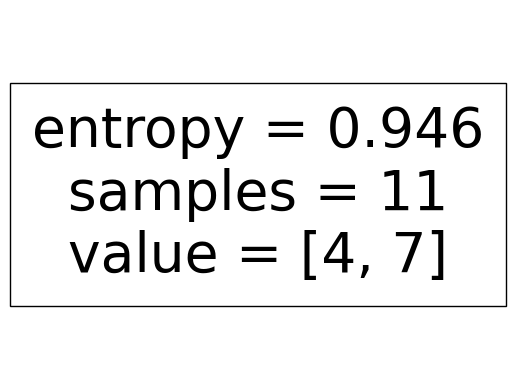

In [101]:
plot_tree(model)